In [5]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from util.models.cnn_net import cnn_net

In [6]:
train_path = '../../BSc-PRO-res/backprojection/train'
valid_path = '../../BSc-PRO-res/backprojection/valid'
test_path = '../../BSc-PRO-res/backprojection/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=38,
        classes=['potato', 'catfood', 'table'])

Found 282 images belonging to 3 classes.
Found 76 images belonging to 3 classes.
Found 38 images belonging to 3 classes.


In [3]:
model = cnn_net()

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=282 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=76 // batch_size)

Epoch 1/100
8/8 [==============================] - 4s 461ms/step - loss: 2.7852 - acc: 0.4476 - val_loss: 1.0951 - val_acc: 0.2188
Epoch 2/100
8/8 [==============================] - 3s 350ms/step - loss: 1.0919 - acc: 0.4375 - val_loss: 1.0598 - val_acc: 0.4318
Epoch 3/100
8/8 [==============================] - 3s 338ms/step - loss: 0.8039 - acc: 0.5865 - val_loss: 0.6453 - val_acc: 0.6591
Epoch 4/100
8/8 [==============================] - 3s 380ms/step - loss: 0.6123 - acc: 0.6004 - val_loss: 0.5827 - val_acc: 0.7188
Epoch 5/100
8/8 [==============================] - 3s 383ms/step - loss: 0.5734 - acc: 0.6387 - val_loss: 0.4189 - val_acc: 0.7045
Epoch 6/100
8/8 [==============================] - 3s 351ms/step - loss: 0.4910 - acc: 0.6677 - val_loss: 0.4665 - val_acc: 0.7273
Epoch 7/100
8/8 [==============================] - 3s 380ms/step - loss: 0.4417 - acc: 0.7657 - val_loss: 0.4568 - val_acc: 0.6719
Epoch 8/100
8/8 [==============================] - 3s 385ms/step - loss: 0.4697 - a

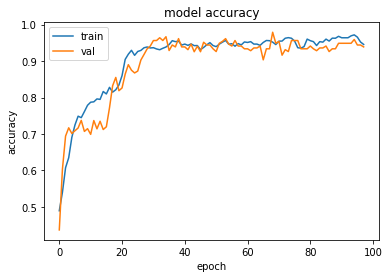

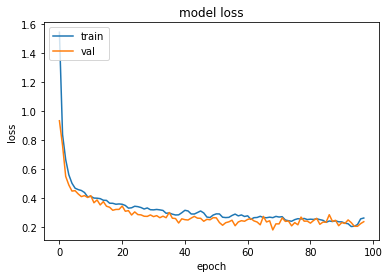

In [5]:
plot_history(history, mean_N=3, save=True, path='saved_plots/', name='decay0.025')

In [6]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=38)

38/38 [==============================] - 0s 8ms/step


[0.5017475485801697, 0.9473684430122375]

In [7]:
# serialize model to JSON
model_json = model.to_json()
with open("saved_models/decay0,025.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("saved_models/decay0,025.h5")

<b>Test Accuracy with different configurations</b>

Decay = 0.05      accuracy = 0.9473
Decay = 0.025     accuracy = 0.9473

<h1>Import saved model</h1>

In [1]:
from util.models.cnn_net import load_model
from util.models.cnn_net import measure_accuracy

Using TensorFlow backend.


In [2]:
model = load_model('decay0,025')

In [7]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=38)

38/38 [==============================] - 1s 24ms/step


[0.5017475485801697, 0.9473684430122375]

In [21]:
predictions = model.predict(imgs)
measure_accuracy(predictions, labels)

1.0

/home/emil/anaconda3/envs/NN1.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


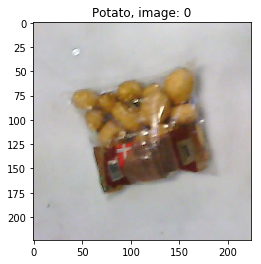

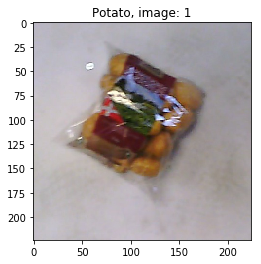

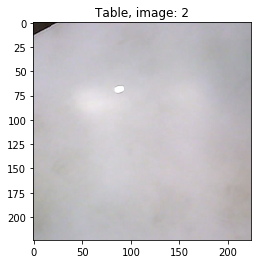

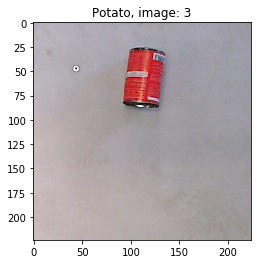

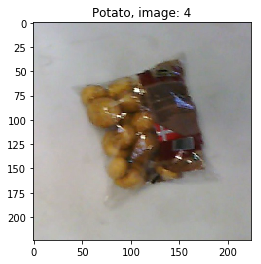

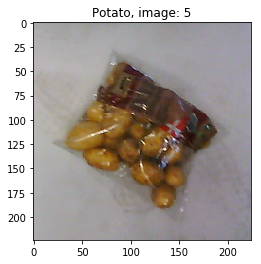

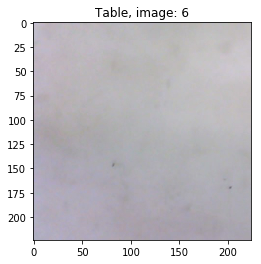

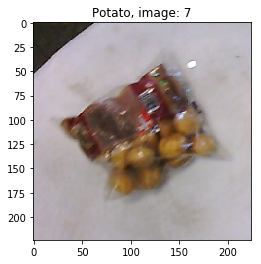

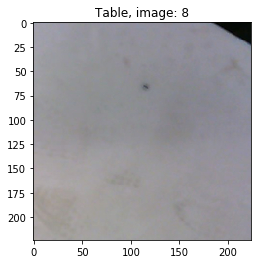

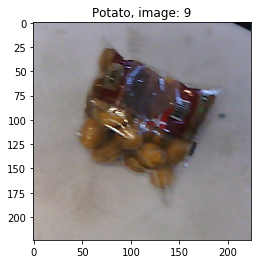

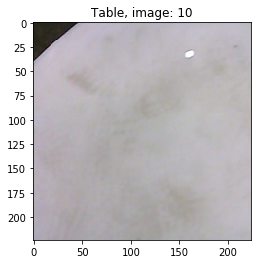

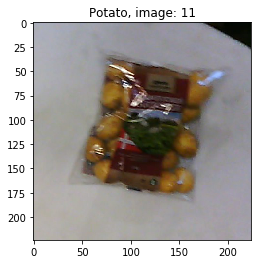

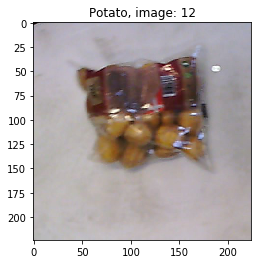

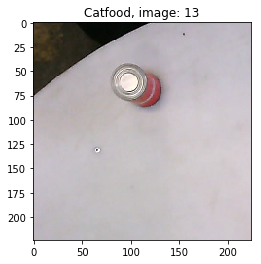

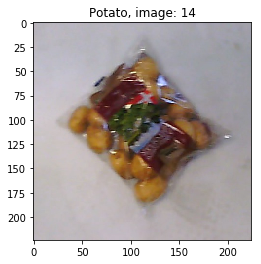

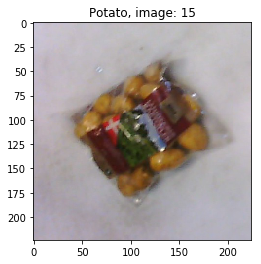

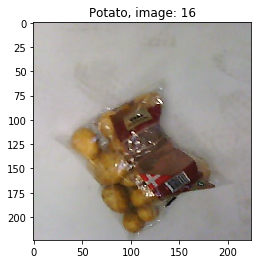

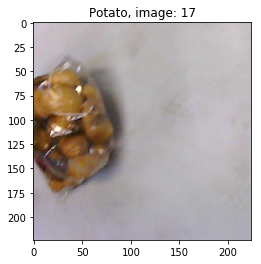

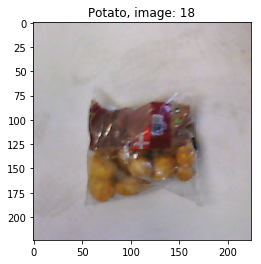

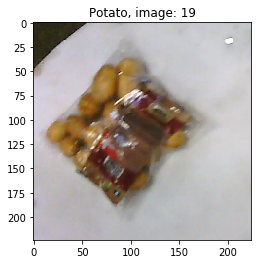

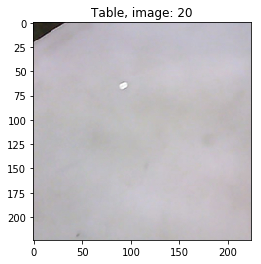

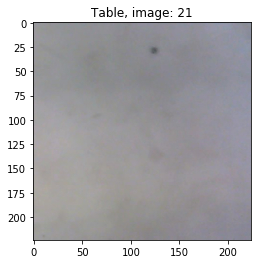

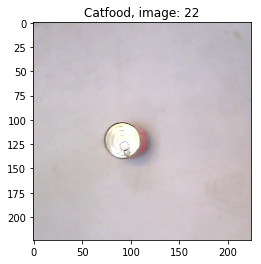

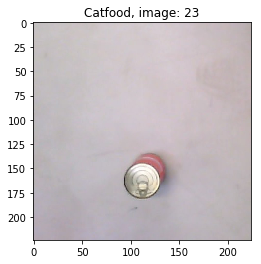

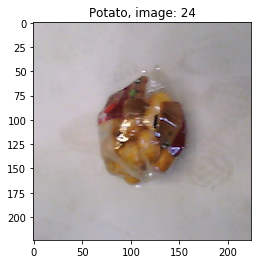

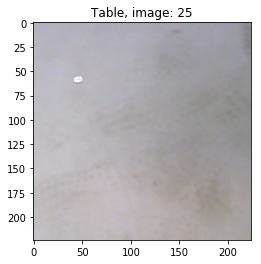

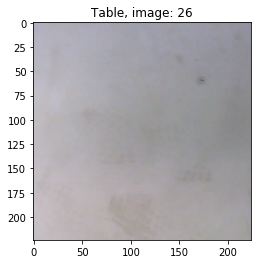

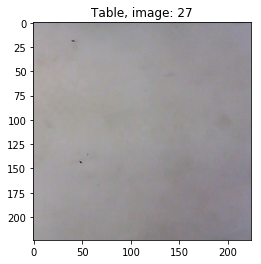

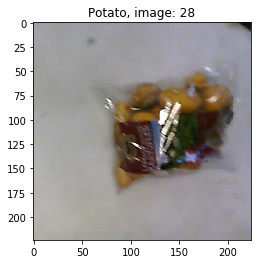

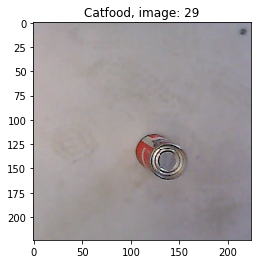

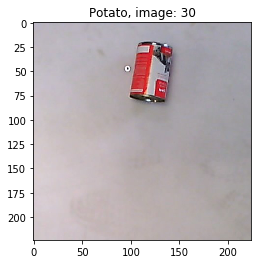

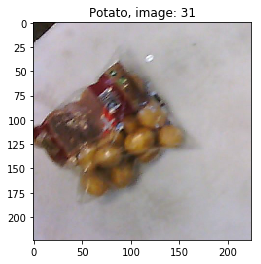

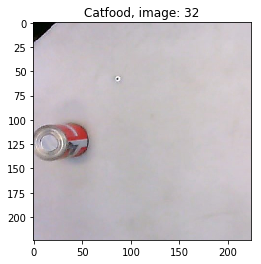

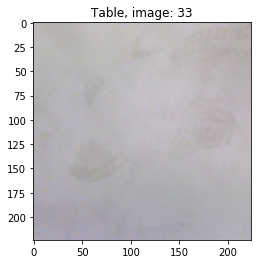

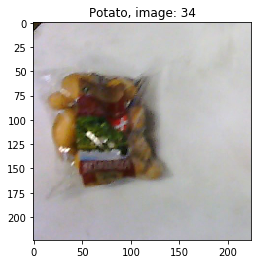

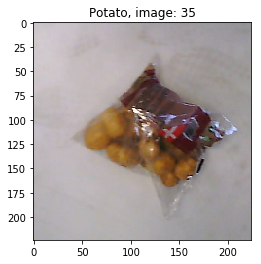

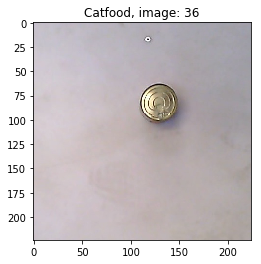

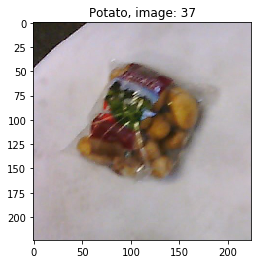

In [18]:
for i in range(imgs.shape[0]):
    plt.figure(i)
    predict = np.argmax(predictions[i])
    if (predict == 0):
        plt.title("Potato, image: " + str(i) )
    if (predict == 1):
        plt.title("Catfood, image: " + str(i) )
    if (predict == 2):
        plt.title("Table, image: " + str(i) )
    plt.imshow(imgs[i])